In [1]:
import os
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import random

from functionsFIMS import getAnalysisNumbers
from runDataClass import runData
from polyaClass import myPolya

In [45]:
if __name__ == '__main__':
    runNos = getAnalysisNumbers()
    simData = runData(1148)
    treenames = simData.getTreeNames()
    print(treenames)
    for name in treenames:
        simData.printColumns(name)

['metaData', 'fieldLineData', 'gridFieldLineData', 'edgeFieldLineData', 'electronData', 'ionData', 'avalancheData', 'electronTrackData', 'signalData']
metaData:
['Git Version', 'runNo', 'Pad Length', 'Pitch', 'Grid Standoff', 'Grid Thickness', 'Hole Radius', 'Cathode Height', 'Thickness SiO2', 'Pillar Radius', 'Electric Field Ratio', 'Number of Field Lines', 'Transparency Limit', 'Number of Avalanches', 'Avalanche Limit', 'Gas Comp: Ar', 'Gas Comp: CO2', 'Drift Field', 'Drift Velocity (Drift) ', 'Diffusion L (Drift)', 'Diffusion T (Drift)', 'Optical Transparency', 'Field Transparency', 'Field Bundle Radius', 'Raw Gain', 'Average IBN', 'Average IBF', 'IBF * Raw Gain']
fieldLineData:
['Field Line ID', 'Field Line x', 'Field Line y', 'Field Line z']
gridFieldLineData:
['Field Line ID', 'Grid Line Location', 'Field Line x', 'Field Line y', 'Field Line z']
Missing 'edgeFieldLineData' data.
electronData:
['Avalanche ID', 'Electron ID', 'Initial x', 'Initial y', 'Initial z', 'Initial Time', '

In [ ]:
if __name__ == '__main__':
    binWidth=3
    simData.plotAvalancheSize(binWidth)
    simData.plotAvalancheFits(binWidth)

    thresh = 10
    fitPolya = myPolya(24.701, 0.488)
    efficiency = fitPolya.calcEfficiencyErrs(thresh, 0.671, 0.095)
    print(f'{efficiency[0]:.3f} (+{efficiency[1]:.3f}, {efficiency[2]:.3f})')

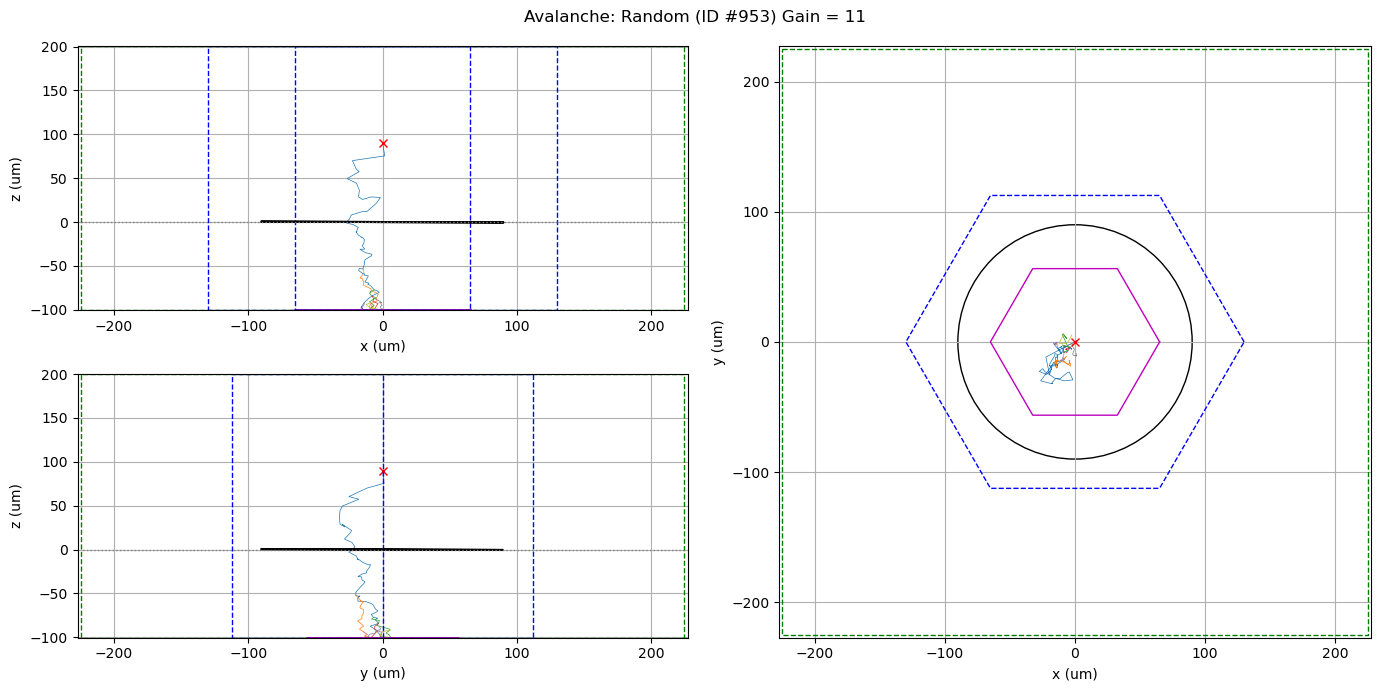

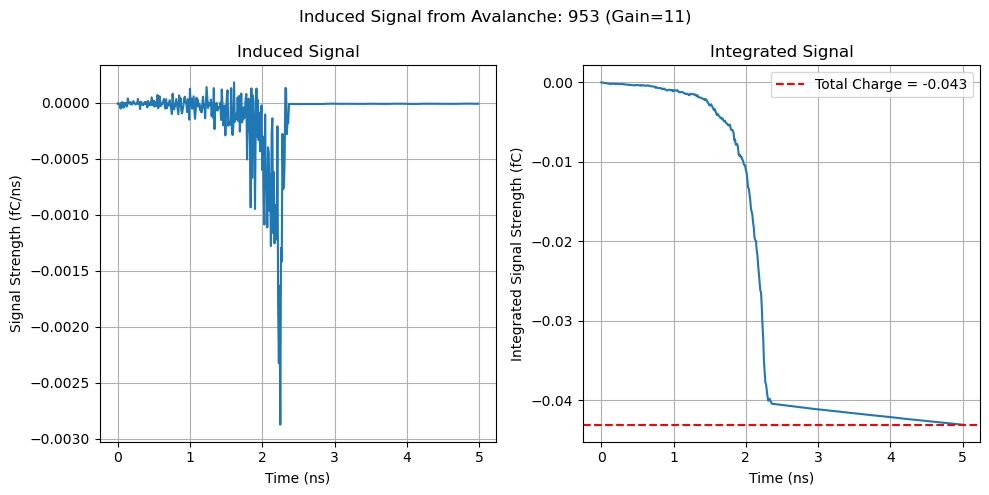

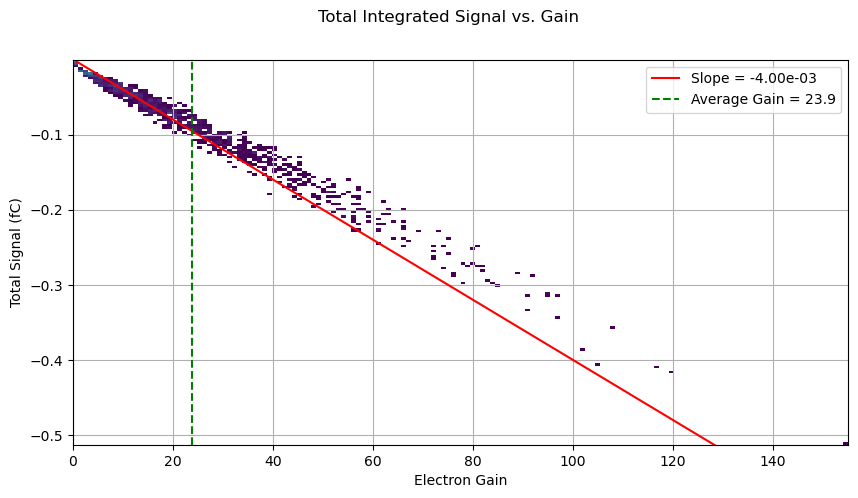

In [94]:
if __name__ == '__main__':
    randInt = random.randint(0, 999)
    simData.plotAvalanche2D(randInt, plotName='Random')
    simData.plotAvalancheSignal(randInt)
    simData.plotSignalvsGain()

In [101]:
TESTDATA = runData(1172)

In [102]:
def getLargestRadius(xData, yData):
    """
    TODO
    """
    radius2 = xData**2 + yData**2
    maxRadius = math.sqrt(radius2.max())
    minRadius = math.sqrt(radius2.min())

    return maxRadius, minRadius

    

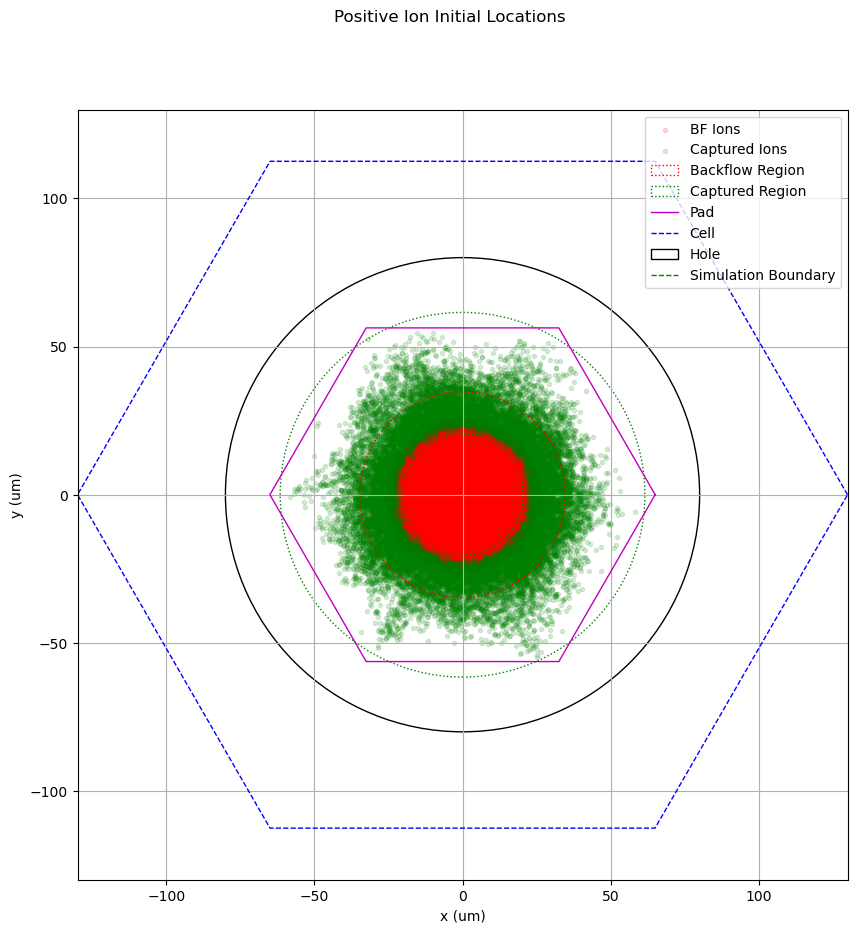

In [103]:
def showIonStarts(runData):
    """
    TODO
    """
    allIons = runData.getDataFrame('ionData')
    posIons = allIons[allIons['Ion Charge']==1]
    
    bfIons = posIons[posIons['Final z']>=1]
    capIons = posIons[posIons['Final z']<1]


    bfMaxRad, bfMinRad = getLargestRadius(np.array(bfIons['Initial x'].values), np.array(bfIons['Initial y'].values))    
    bfCircle = plt.Circle(
        (0, 0), bfMaxRad, 
        facecolor='none', edgecolor='r', ls=':', lw=1, label='Backflow Region'
    )
    
    capMaxRad, capMinRad = getLargestRadius(np.array(capIons['Initial x'].values), np.array(capIons['Initial y'].values))   
    capCircle0 = plt.Circle(
        (0, 0), capMaxRad, 
        facecolor='none', edgecolor='g', ls=':', lw=1, label='Captured Region'
    )
    capCircle1 = plt.Circle(
        (0, 0), capMinRad, 
        facecolor='none', edgecolor='g', ls=':', lw=1
    )

    fig = plt.figure(figsize=(10, 10))
    fig.suptitle('Positive Ion Initial Locations')
    ax = fig.add_subplot(111)

    ax.scatter(
        bfIons['Initial x'], bfIons['Initial y'],
        label='BF Ions', c='r', marker='.', alpha=.15
    )
    ax.scatter(
        capIons['Initial x'], capIons['Initial y'],
        label='Captured Ions', c='g', marker='.', alpha=0.15
    )

    ax.add_patch(bfCircle)
    ax.add_patch(capCircle0)
    ax.add_patch(capCircle1)
    
    
    runData._plotAddCellGeometry(ax, 'xy')

    padLength = runData.getRunParameter('Pad Length')
    pitch = runData.getRunParameter('Pitch')
    axLim = pitch/math.sqrt(3)
    ax.set_xlim(-axLim, axLim)
    ax.set_ylim(-axLim, axLim)
    ax.legend()

    return fig

_ = showIonStarts(TESTDATA)

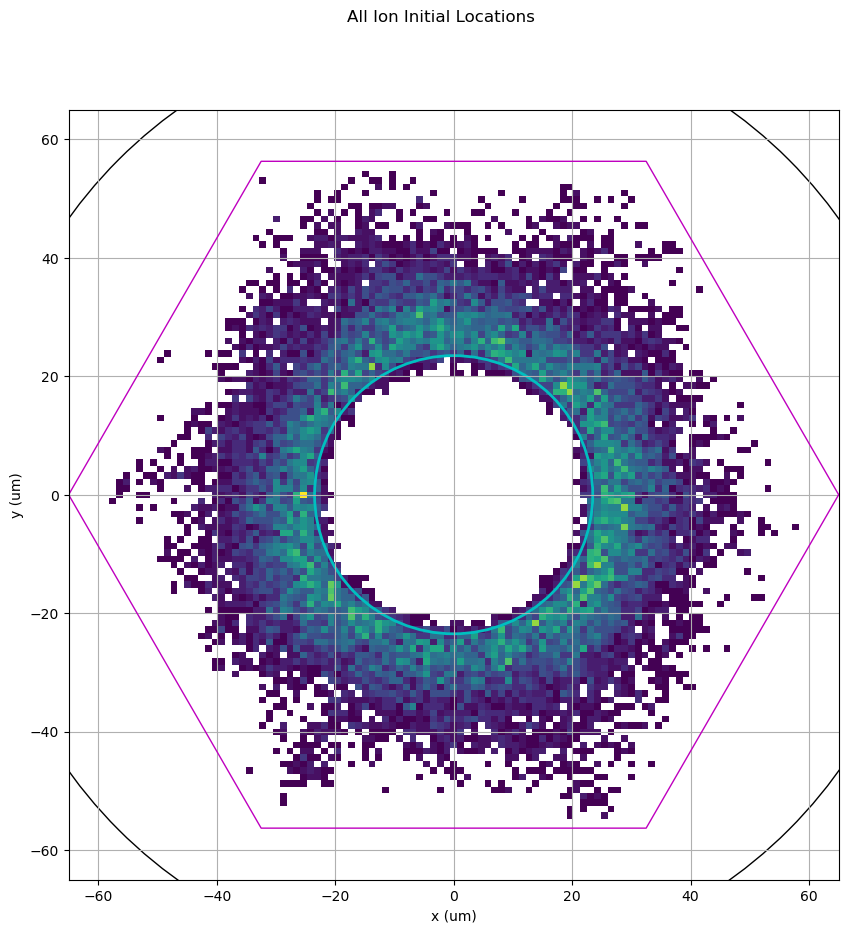

In [110]:
def showIonHist(runData):
    """
    """
    allIons = runData.getDataFrame('ionData')
    posIons = allIons[allIons['Ion Charge']==1]
    posIons = posIons[posIons['Initial z']!=posIons['Initial z'].iloc[0]]
    
    bfIons = posIons[posIons['Final z']>=1]
    capIons = posIons[posIons['Final z']<1]

    bfMaxRad, bfMinRad = getLargestRadius(np.array(bfIons['Initial x'].values), np.array(bfIons['Initial y'].values))
    bfCircle = plt.Circle(
        (0, 0), bfMaxRad,
        facecolor='none', edgecolor='r', ls=':', lw=1, label='Backflow Region'
    )
    
    capMaxRad, capMinRad = getLargestRadius(np.array(capIons['Initial x'].values), np.array(capIons['Initial y'].values))
    capCircle0 = plt.Circle(
        (0, 0), capMaxRad,
        facecolor='none', edgecolor='g', ls=':', lw=1, label='Captured Region'
    )
    capCircle1 = plt.Circle(
        (0, 0), capMinRad,
        facecolor='none', edgecolor='g', ls=':', lw=1
    )

    nominalFieldBundle = plt.Circle(
            (0, 0), runData.getRunParameter('Field Bundle Radius'), 
            facecolor='none', edgecolor='c', lw=2
        )

    fig = plt.figure(figsize=(10, 10))
    fig.suptitle('All Ion Initial Locations')
    ax = fig.add_subplot(111)
    '''
    ax.hist2d(
        posIons['Initial x'], posIons['Initial y'],
        bins=101, cmin=1
    )
    '''
    '''
    ax.hist2d(
        bfIons['Initial x'], bfIons['Initial y'],
        bins=101, cmin=1
    )
    '''
    ax.hist2d(
        capIons['Initial x'], capIons['Initial y'],
        bins=101, cmin=1
    )

    #ax.add_patch(bfCircle)
    #ax.add_patch(capCircle0)
    #ax.add_patch(capCircle1)
    ax.add_patch(nominalFieldBundle)
    
    runData._plotAddCellGeometry(ax, 'xy')

    padLength = runData.getRunParameter('Pad Length')
    pitch = runData.getRunParameter('Pitch')
    
    largeLim = pitch/math.sqrt(3)
    axLim = padLength
    ax.set_xlim(-axLim, axLim)
    ax.set_ylim(-axLim, axLim)
    #ax.legend()

    return fig

_ = showIonHist(TESTDATA)